# Week 12

## Second to last week :(

### Continue working on projects

## *Remember*
### Project Guidelines
- <font color="red">Introduction</font> (what is this going to be about, the only information he will know about this) maybe put some references in there
- <font color="red">Methods</font> section (tell a little about where the data came from, tell about the dataset itself, add a little bit about your data analysis if you do use some statistical analysis ex. i am going to use a t test with a significant value of 0.05)
- <font color="red">Results</font> (no discussion in this part, only listing what you found, a summary of what is to come, tables are nice to have)
    - this is optional but it is more like a paper for a journal
    - if it is not added put results in discussion more like a normal data science paper
    - this is where the code should be
- <font color="red">Discussion</font> section, he suggests doing results and discussion together
- <font color="red">Conclusion</font> short summary can even say this is interesting but not much is found might need to perform further investigation...
- <font color="red">Reference</font> section at bottom (don't go crazy)

## Start of week 12 notes

What is EDA?
- summary statistics
- data visualization

In [4]:
# import stats from scipy, numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
%config InlineBackend.figure_format = 'retina'

# Import data

In [5]:
# import the data set ICU_Mortality.csv and assign it to the variable df
df = pd.read_csv('ICU_Mortality.csv')

In [6]:
# show the first 5 rows of the data set
df.head()

,Mortality,Age,WCC,HB,Diabetes,Class
0,Died,69,12.0,11.7,NaN,Non-infectious
1,Died,73,9.0,13.2,NaN,Non-infectious
2,Died,53,16.4,11.1,NaN,Non-infectious
3,Died,74,10.1,11.2,Type II,Infectious
4,Died,69,10.2,15.0,Type I,Infectious


In [8]:
# show the info of the columns in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mortality  311 non-null    object 
 1   Age        311 non-null    int64  
 2   WCC        311 non-null    float64
 3   HB         311 non-null    float64
 4   Diabetes   213 non-null    object 
 5   Class      311 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.7+ KB


## EDA

### Level of measurement
- Categorical: nominal or ordinal
- Numerical: ratio or interval

## Mortality

In [10]:
# calculate the frequency of the categories in the 'Mortality' column
df['Mortality'].value_counts()

Mortality
Survived    207
Died        104
Name: count, dtype: int64

In [11]:
# calculate the relative frequency of the categories in the 'Mortality' column
df['Mortality'].value_counts(normalize=True)

Mortality
Survived    0.665595
Died        0.334405
Name: proportion, dtype: float64

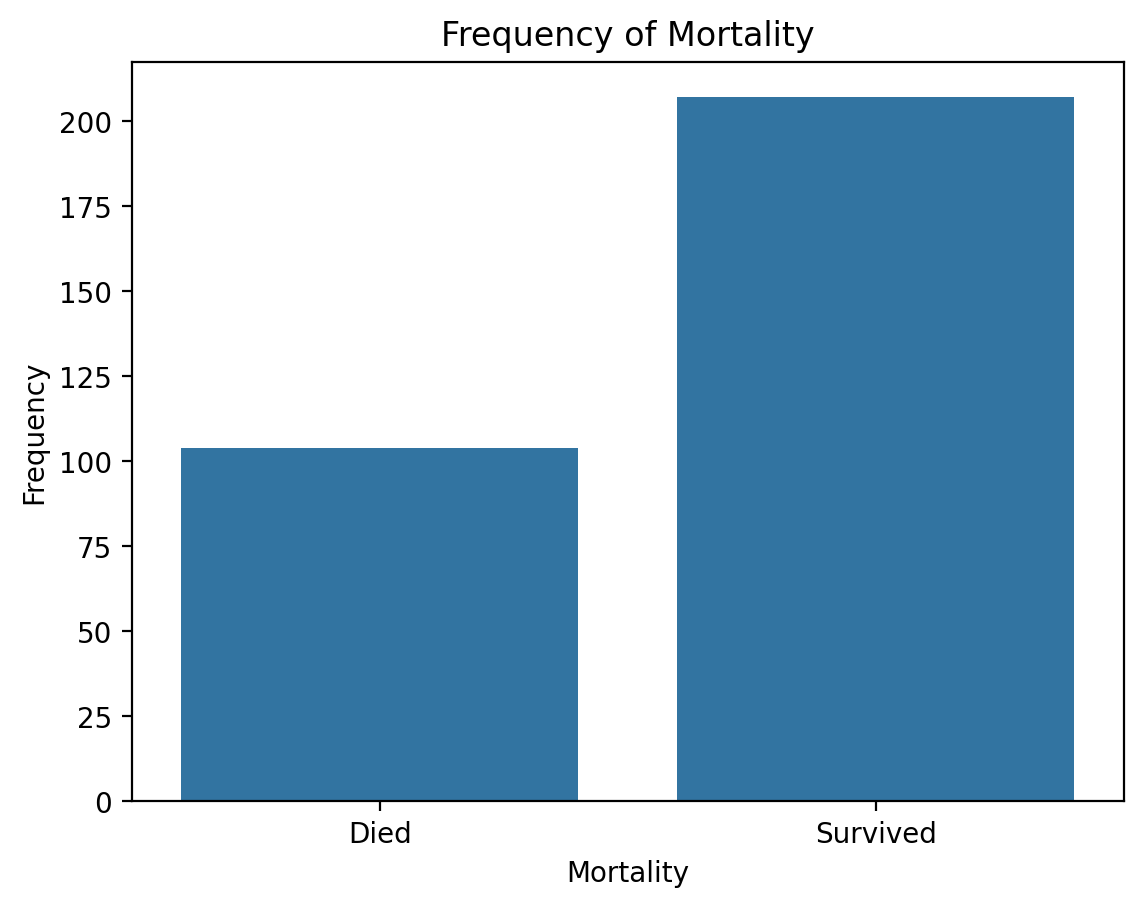

In [14]:
# create a bar chart of the frequency of the categories in the 'Mortality' column
sns.countplot(x='Mortality', data=df)
plt.title('Frequency of Mortality')
plt.xlabel('Mortality')
plt.ylabel('Frequency')
plt.show()

### Age

In [15]:
# Calculate the summary statistics of the 'Age' column for each category of the 'Mortality' column
df.groupby('Mortality')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Mortality,,,,,,,,
Died,104.0,61.125000,9.738012,45.0,52.75,61.0,69.0,77.0
Survived,207.0,54.111111,10.830209,23.0,47.00,53.0,60.0,85.0


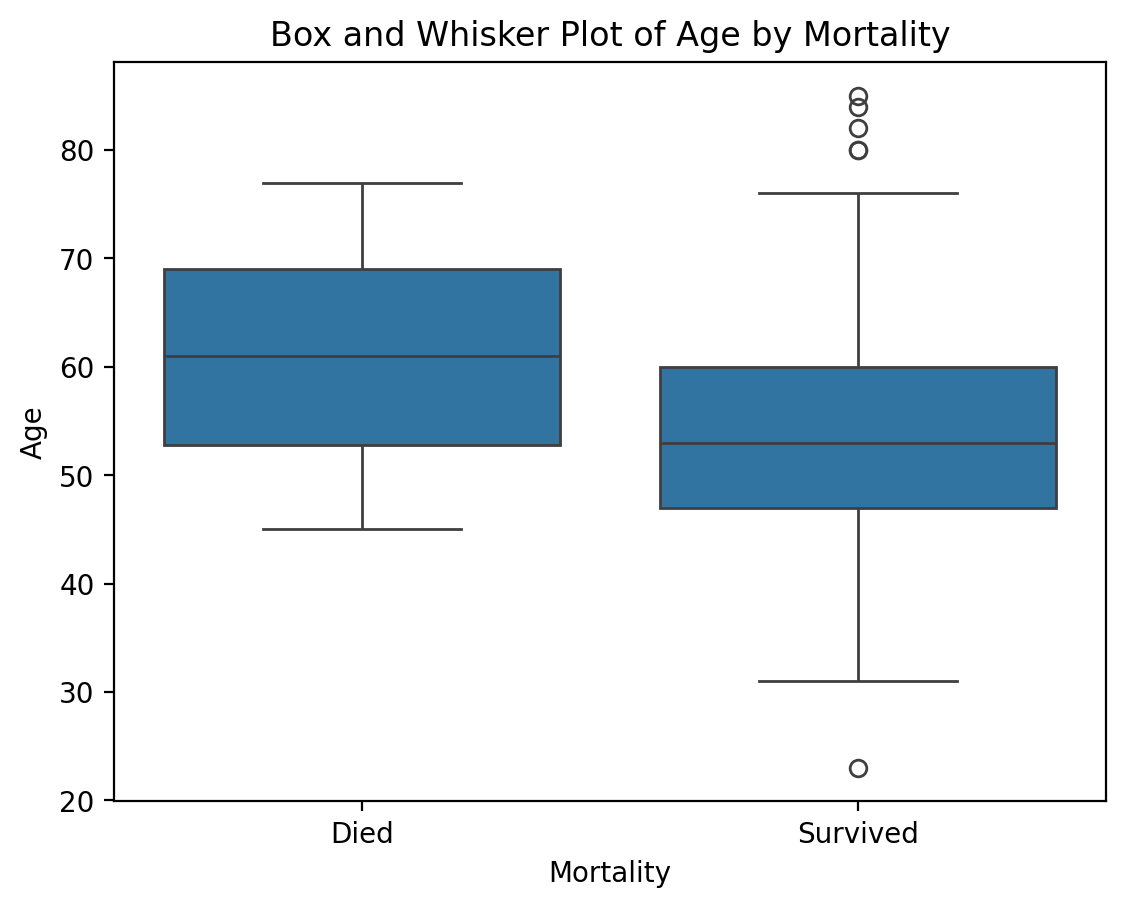

In [16]:
# Create a box and whisker plot of the 'Age' column for each category of the 'Mortality' column
sns.boxplot(x='Mortality', y='Age', data=df)
plt.title('Box and Whisker Plot of Age by Mortality')
plt.xlabel('Mortality')
plt.ylabel('Age')
plt.show()

## Statistical Tests

Numerical and Categorical (binary)
- compare ___ between the two categories in the binary column
    - ___ could be mean, median
    Mean: t tests--> Student's (equal var or pooled var) OR Welch's (unequal var)
    Median: Mann Whitney U test

### Age comparison between survivors and non-survivors

In [17]:
# create a numpy array of the 'Age' column only for the 'Mortality' category "Died" assign to the variable age_died
age_died = df[df['Mortality'] == 'Died']['Age'].to_numpy()

# create a numpy array of the 'Age' column only for the 'Mortality' category "Survived" assign to the variable age_survived
age_survived = df[df['Mortality'] == 'Survived']['Age'].to_numpy()

In [18]:
# calculate the ratio of variances between age_died and age_survived
age_died.var() / age_survived.var()

np.float64(0.8045888311255794)

In [19]:
# conduct Levene's test for equality of variances
stats.levene(age_died, age_survived)

LeveneResult(statistic=np.float64(7.0145796435275225e-06), pvalue=np.float64(0.9978885101059543))

Since Levene's test p-value is very high we fail to reject that the variances are equal so we go to an equal variance t-test

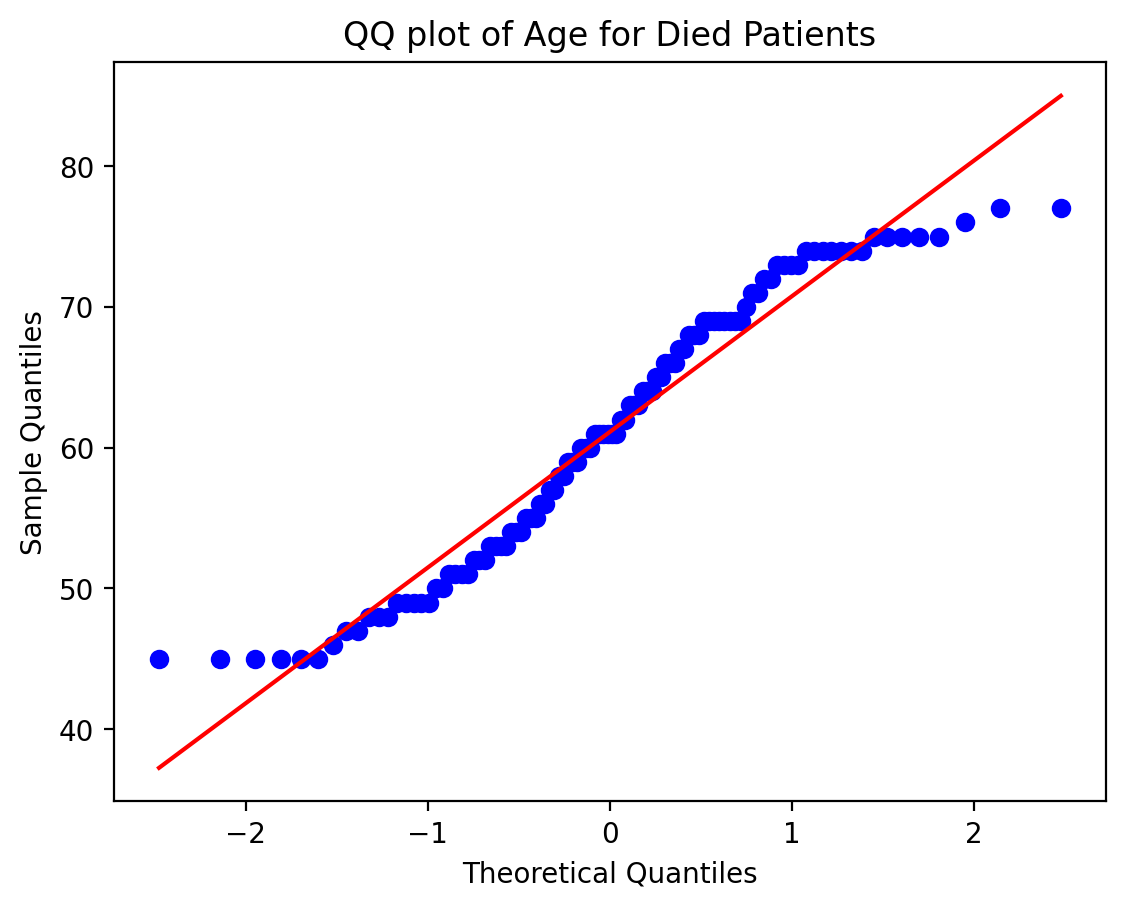

In [22]:
# Create a QQ plot of the age_died data
# Add the title QQ plot of Age for Died Patients
stats.probplot(age_died, dist="norm", plot=plt)
plt.title('QQ plot of Age for Died Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

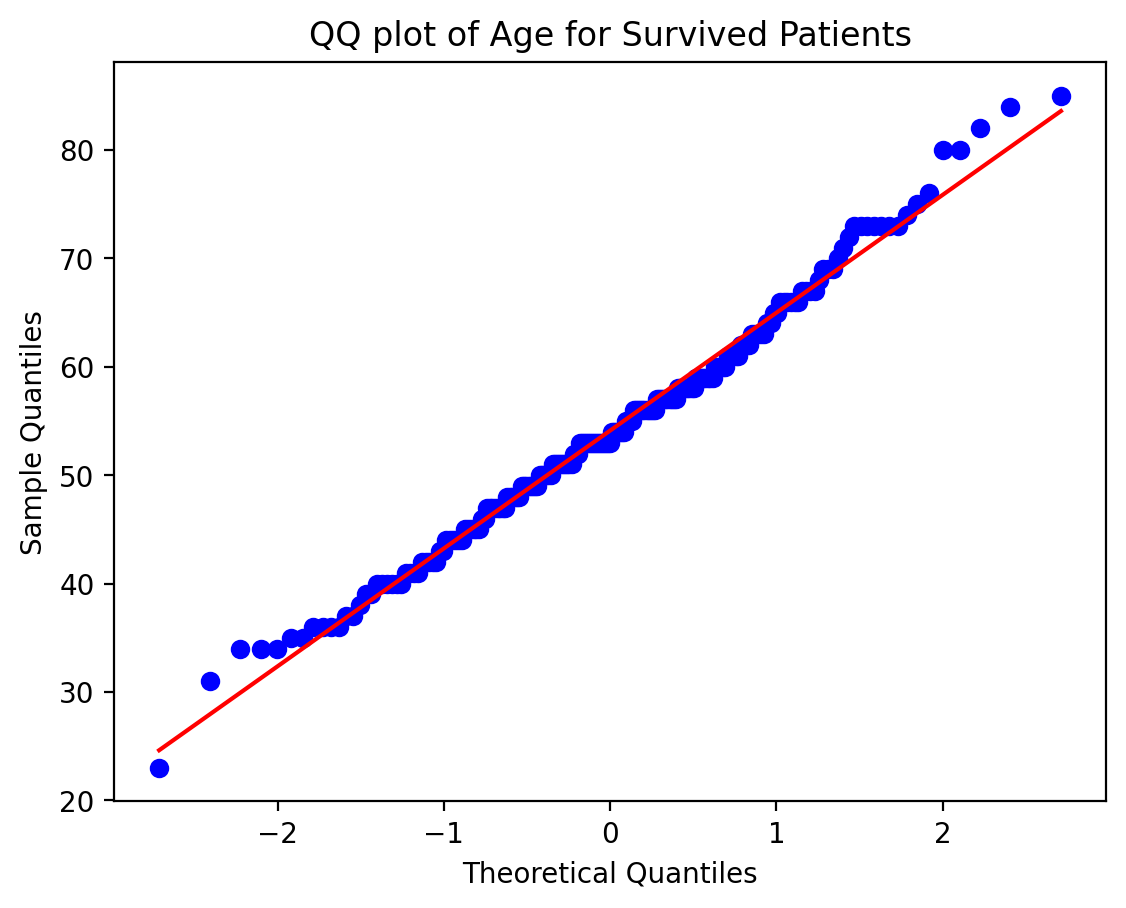

In [23]:
# Create a QQ plot of the age_survived data
# Add the title QQ plot of Age for Survived Patients
stats.probplot(age_survived, dist="norm", plot=plt)
plt.title('QQ plot of Age for Survived Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [24]:
# Counduct a Shapiro-Wilk test for normality on the age_died data
stats.shapiro(age_died)

ShapiroResult(statistic=np.float64(0.9420111357919863), pvalue=np.float64(0.00018938181206075024))

In [25]:
# Conduct a t test for equal means between the age_died and age_survived data
# set the sigificance level to 0.05
alpha = 0.05
# conduct the t test
t_stat, p_value = stats.ttest_ind(age_died, age_survived, equal_var=True)
# print the t statistic and p value
print(f'T statistic: {t_stat}')
print(f'P value: {p_value}')
# check if the p value is less than the significance level
if p_value < alpha:
    print('Reject the null hypothesis: there is a significant difference between the means of the two groups.')
else:
    print('Fail to reject the null hypothesis: there is no significant difference between the means of the two groups.')

T statistic: 5.568894557769548
P value: 5.575021676545234e-08
Reject the null hypothesis: there is a significant difference between the means of the two groups.


The mean age of the survivors is 54 years (SD: `0.8`), while the mean age of the non-survivors is 61 years (SD: 9.7). There is enough evidence in the data at the 5% level of significance to concludde that the mean age of survivors is different from the mean age of the non-survivors. The p-value is less than 0.05, indicating a statistically significant difference in age between the two groups.

In [26]:
# Conduct a Mann-Whitney U test for equal medians between the age_died and age_survived data
# set the significance level to 0.05
alpha = 0.05
# conduct the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(age_died, age_survived, alternative='two-sided')
# print the U statistic and p value
print(f'U statistic: {u_stat}')
print(f'P value: {p_value}')
# check if the p value is less than the significance level
if p_value < alpha:
    print('Reject the null hypothesis: there is a significant difference between the medians of the two groups.')
else:
    print('Fail to reject the null hypothesis: there is no significant difference between the medians of the two groups.')

U statistic: 14709.5
P value: 1.3213922162691065e-07
Reject the null hypothesis: there is a significant difference between the medians of the two groups.


The mean age of the survivors is 54 years (SD: 10.8), while the mean age of the non-survivors is 61 years (SD: 9.7). There is enough evidence in the data at the 5% level of significance to concludde that the mean age of survivors is different from the mean age of the non-survivors. Due to the violation of normality, the Mann-Whitney U test was used to compare the two groups. The p-value is less than 0.05, indicating a statistically significant difference in age between the two groups.

## Looking at two categorical values

- Compare association
    - dependence
- Pearson's X^2 test (chi-square test for association / chi-square test for independence)

### Mortality vs Class

In [27]:
# Create a contigency table of the Class and Mortality columns
pd.crosstab(df['Class'], df['Mortality'])

Mortality,Died,Survived
Class,,
Infectious,49,101
Non-infectious,55,106


In [28]:
# add a totals row and column to the contingency table
pd.crosstab(df['Class'], df['Mortality'], margins=True)


Mortality,Died,Survived,All
Class,,,
Infectious,49,101,150
Non-infectious,55,106,161
All,104,207,311


In [30]:
# use the contigency table to calculate the expected frequencies
# calculate the expected frequencies
contingency_table = pd.crosstab(df['Class'], df['Mortality'])
expected_frequencies = stats.contingency.expected_freq(contingency_table)
# print the expected frequencies
print(expected_frequencies)


[[ 50.1607717  99.8392283]
 [ 53.8392283 107.1607717]]


In [31]:
# conduct a chi square test for independence between the Class and Mortality columns
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# print the chi square statistic, p value, and degrees of freedom
print(f'Chi square statistic: {chi2_stat}')
print(f'P value: {p_value}')
print(f'Degrees of freedom: {dof}')
# check if the p value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: there is a significant association between the Class and Mortality variables.')
else:
    print('Fail to reject the null hypothesis: there is no significant association between the Class and Mortality variables.')

Chi square statistic: 0.025261737710934283
P value: 0.8737166065287936
Degrees of freedom: 1
Fail to reject the null hypothesis: there is no significant association between the Class and Mortality variables.


# Numerical vs Numerical

- Correlation (linear association)


### WCC vs HB

In [32]:
# Summary statistics of the WCC column
df['WCC'].describe()

count    311.000000
mean      10.286817
std        4.023486
min       -0.800000
25%        7.600000
50%       10.000000
75%       12.650000
max       30.800000
Name: WCC, dtype: float64

In [33]:
# summary statistics of the HB column
df['HB'].describe()

count    311.000000
mean      13.529260
std        2.459835
min        4.900000
25%       11.950000
50%       13.600000
75%       15.150000
max       20.200000
Name: HB, dtype: float64

In [34]:
# conduct a pearson correlation test between the WCC and HB columns
correlation, p_value = stats.pearsonr(df['WCC'], df['HB'])
# print the correlation coefficient and p value
print(f'Correlation coefficient: {correlation}')
print(f'P value: {p_value}')
# check if the p value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: there is a significant correlation between the WCC and HB variables.')
else:
    print('Fail to reject the null hypothesis: there is no significant correlation between the WCC and HB variables.')

Correlation coefficient: -0.1511259167946297
P value: 0.007590698508170839
Reject the null hypothesis: there is a significant correlation between the WCC and HB variables.


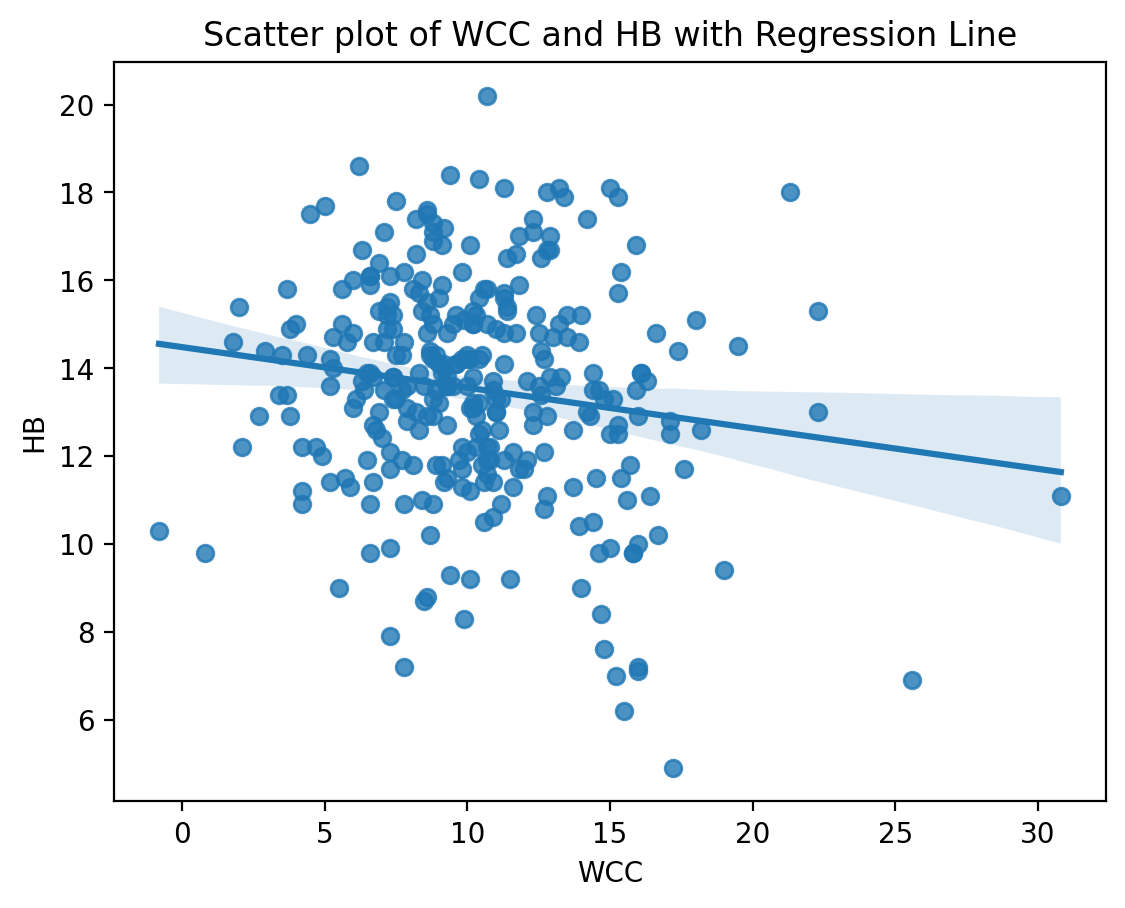

In [35]:
# make a scatter plot of the WCC and HB columns with a regression line
sns.regplot(x='WCC', y='HB', data=df)
plt.title('Scatter plot of WCC and HB with Regression Line')
plt.xlabel('WCC')
plt.ylabel('HB')
plt.show()